<a href="https://colab.research.google.com/github/Bandna123/BK-_RevaPGDBM_MyProjects/blob/master/customer_life_time_value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the dataset
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
dataset = pd.read_excel("cs.xlsx",encoding="ISO-8859-1",dtype={'Customer_Code': str,'Invoice_No': str})
dataset['Invoice_Date'] = pd.to_datetime(dataset['Invoice_Date'])
dataset.shape
dataset.head(5)

,Invoice_No,SKU_Code,Business_Partner,Item_Description,Quantity,Invoice_Date,Unit_Price,Customer_Code,Invoice_Description,Total_Value,Customer_City,State
0,1596180042798,66555338,U K OPTICAL CENTRE,AIROPTIX AQC SPH 6PK -0400,-1,2019-04-01,883.93,30000041419,wrongly order punched,-883.93,Bangalore,Karnataka
1,1596180042799,411226,VISION WORLD PVT LTD,OPTIX 6P -0350,-1,2019-04-01,530.80,30000041496,wrongly order punched,-530.80,Bangalore,Karnataka
2,1596180042800,66532759,JAWAHAR OPTICIANS,AIROPTIX TORIC 3-PK -0475 125 030,-1,2019-04-01,491.07,30000041081,sales return against no:159618003/8842 dt:25-1...,-491.07,Dharwad,Karnataka
3,1596180042801,66555185,EYE PLUS OPTICIANS,AIROPTIX AQC SPH 6PK -0025,-1,2019-04-01,883.93,30000040955,NaN,-883.93,Hubli,Karnataka
4,1596180042802,545085,MIRLAY EYE CARE,FRESHLOOK 1-D COL 10 -0300 P HAZEL,-1,2019-04-01,441.96,30000041147,customer cancel the order,-441.96,Bangalore,Karnataka


In [ ]:
filtered_data=dataset[['State','Customer_Code']].drop_duplicates()

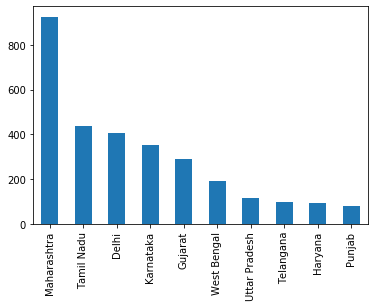

In [ ]:
#Top ten State's customer
filtered_data.State.value_counts()[:10].plot(kind='bar')

In [ ]:
mh_data=dataset[dataset.State=='Maharashtra']
mh_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83567 entries, 120 to 279988
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Invoice_No           83567 non-null  object        
 1   SKU_Code             83567 non-null  object        
 2   Business_Partner     83567 non-null  object        
 3   Item_Description     83567 non-null  object        
 4   Quantity             83567 non-null  int64         
 5   Invoice_Date         83567 non-null  datetime64[ns]
 6   Unit_Price           83567 non-null  float64       
 7   Customer_Code        83567 non-null  object        
 8   Invoice_Description  53377 non-null  object        
 9   Total_Value          83567 non-null  float64       
 10  Customer_City        83567 non-null  object        
 11  State                83567 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 8.3+ MB


In [ ]:
mh_data.describe()

,Quantity,Unit_Price,Total_Value
count,83567.000000,83567.000000,83567.000000
mean,2.762299,641.053747,1449.277427
std,11.016211,361.346978,4188.939870
min,-247.000000,0.000000,-83589.090000
25%,1.000000,433.040000,441.960000
50%,1.000000,578.610000,831.150000
75%,2.000000,883.930000,1299.110000
max,752.000000,25230.000000,332357.140000


In [ ]:
mh_data = mh_data[(mh_data['Quantity']>0)]
mh_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79024 entries, 2902 to 279814
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Invoice_No           79024 non-null  object        
 1   SKU_Code             79024 non-null  object        
 2   Business_Partner     79024 non-null  object        
 3   Item_Description     79024 non-null  object        
 4   Quantity             79024 non-null  int64         
 5   Invoice_Date         79024 non-null  datetime64[ns]
 6   Unit_Price           79024 non-null  float64       
 7   Customer_Code        79024 non-null  object        
 8   Invoice_Description  49919 non-null  object        
 9   Total_Value          79024 non-null  float64       
 10  Customer_City        79024 non-null  object        
 11  State                79024 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 7.8+ MB


In [ ]:
mh_data=mh_data[['Customer_Code','Invoice_Date','Invoice_No','Quantity','Unit_Price']]
#Calulate total purchase
mh_data['TotalPurchase'] = mh_data['Quantity'] * mh_data['Unit_Price']

In [ ]:
mh_data_group=mh_data.groupby('Customer_Code').agg({'Invoice_Date': lambda date: (date.max() - date.min()).days,
                                        'Invoice_No': lambda num: len(num),
                                        'Quantity': lambda quant: quant.sum(),
                                        'TotalPurchase': lambda price: price.sum()})

In [ ]:
mh_data_group.head()

,Invoice_Date,Invoice_No,Quantity,TotalPurchase
Customer_Code,,,,
30000040543,335,13,13,7343.89
30000041505,140,24,275,94578.16
30000041511,251,25,2659,632302.18
30000041516,349,36,40,21202.54
30000041517,295,32,52,20915.13


In [ ]:
# Change the name of columns
mh_data_group.columns=['num_days','num_transactions','num_units','spent_money']
mh_data_group.head()

,num_days,num_transactions,num_units,spent_money
Customer_Code,,,,
30000040543,335,13,13,7343.89
30000041505,140,24,275,94578.16
30000041511,251,25,2659,632302.18
30000041516,349,36,40,21202.54
30000041517,295,32,52,20915.13


CLTV = ((Average Order Value x Purchase Frequency)/Churn Rate) x Profit margin.

 Customer Value = Average Order Value * Purchase Frequency

In [ ]:
# Average Order Value
mh_data_group['avg_order_value']=mh_data_group['spent_money']/mh_data_group['num_transactions']

In [ ]:
mh_data.head()

,Customer_Code,Invoice_Date,Invoice_No,Quantity,Unit_Price,TotalPurchase
2902,30000041602,2019-01-01,1600180035743,1,433.040000,433.04
2903,30000041774,2019-01-01,1600180035744,1,441.960000,441.96
2904,30000041774,2019-01-01,1600180035745,3,374.840000,1124.52
2905,30000041774,2019-01-01,1600180035745,3,140.153333,420.46
2907,30000055455,2019-01-01,1600180035747,1,491.070000,491.07


In [ ]:
#Calculate Purchase Frequency
purchase_frequency=sum(mh_data_group['num_transactions'])/mh_data_group.shape[0]

In [ ]:
#Calculate Repeat Rate and Churn Rate
# Repeat Rate
repeat_rate=mh_data_group[mh_data_group.num_transactions > 1].shape[0]/mh_data_group.shape[0]

In [ ]:
#Churn Rate
churn_rate=1-repeat_rate

In [ ]:
purchase_frequency,repeat_rate,churn_rate

(87.70699223085461, 0.978912319644839, 0.021087680355160954)

In [ ]:
# Profit Margin
mh_data_group['profit_margin']=mh_data_group['spent_money']*0.05

### caulculate Customer life time value

In [ ]:
# Customer Value
mh_data_group['CLV']=(mh_data_group['avg_order_value']*purchase_frequency)/churn_rate

In [ ]:
#Customer Lifetime Value
mh_data_group['cust_lifetime_value']=mh_data_group['CLV']*mh_data_group['profit_margin']

In [ ]:
#Customer Lifetime Value
mh_data_group.head()

,num_days,num_transactions,num_units,spent_money,avg_order_value,profit_margin,CLV,cust_lifetime_value
Customer_Code,,,,,,,,
30000040543,335,13,13,7343.89,564.914615,367.1945,2.349569e+06,8.627488e+08
30000041505,140,24,275,94578.16,3940.756667,4728.9080,1.639023e+07,7.750789e+10
30000041511,251,25,2659,632302.18,25292.087200,31615.1090,1.051938e+08,3.325713e+12
30000041516,349,36,40,21202.54,588.959444,1060.1270,2.449575e+06,2.596861e+09
30000041517,295,32,52,20915.13,653.597813,1045.7565,2.718417e+06,2.842802e+09
